In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data.csv')
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [3]:
df.info() #divide date into months based on season #change 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [4]:
df['Company'].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [5]:
import datetime
dti = pd.to_datetime(df.Date)
dti

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

In [6]:
df.Date=dti

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     25160 non-null  object        
 1   Date        25160 non-null  datetime64[ns]
 2   Close/Last  25160 non-null  object        
 3   Volume      25160 non-null  int64         
 4   Open        25160 non-null  object        
 5   High        25160 non-null  object        
 6   Low         25160 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


In [8]:
df["Close/Last"]=df["Close/Last"].map(lambda x: float(x.replace("$",""))) #turn objects into floats
df["Open"]=df["Open"].map(lambda x: float(x.replace("$","")))
df["High"]=df["High"].map(lambda x: float(x.replace("$","")))
df["Low"]=df["Low"].map(lambda x: float(x.replace("$","")))

In [9]:
df.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

In [10]:
#s=pd.get_dummies(df.Company)
#df=df.join(s)

In [11]:
#df.rename(columns={"Close/Last": "Last"})

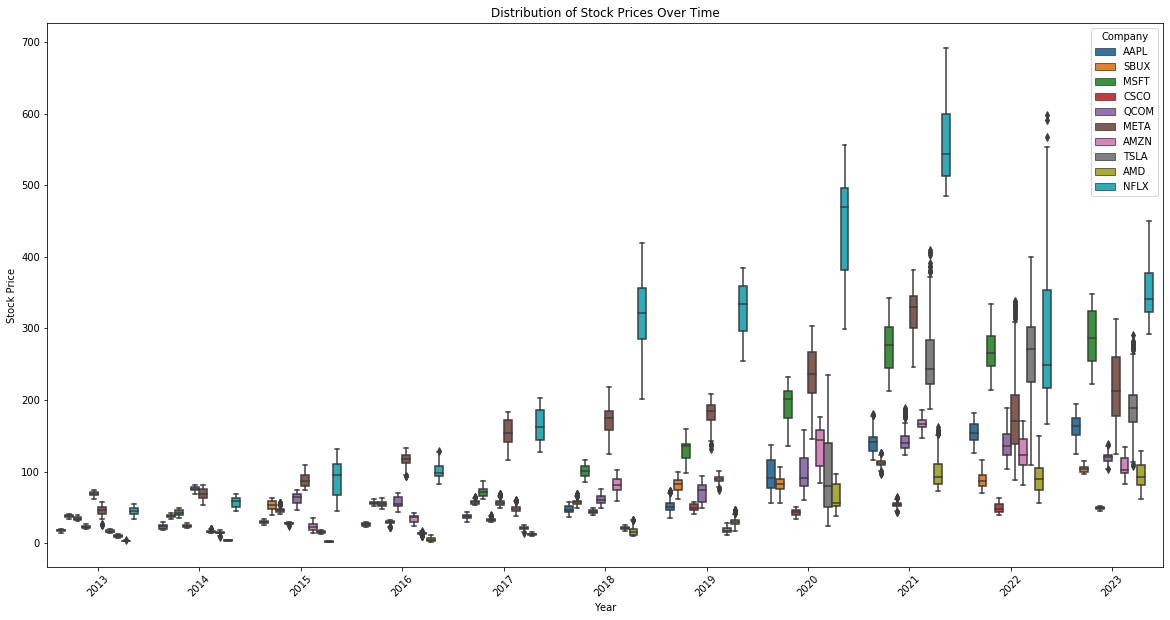

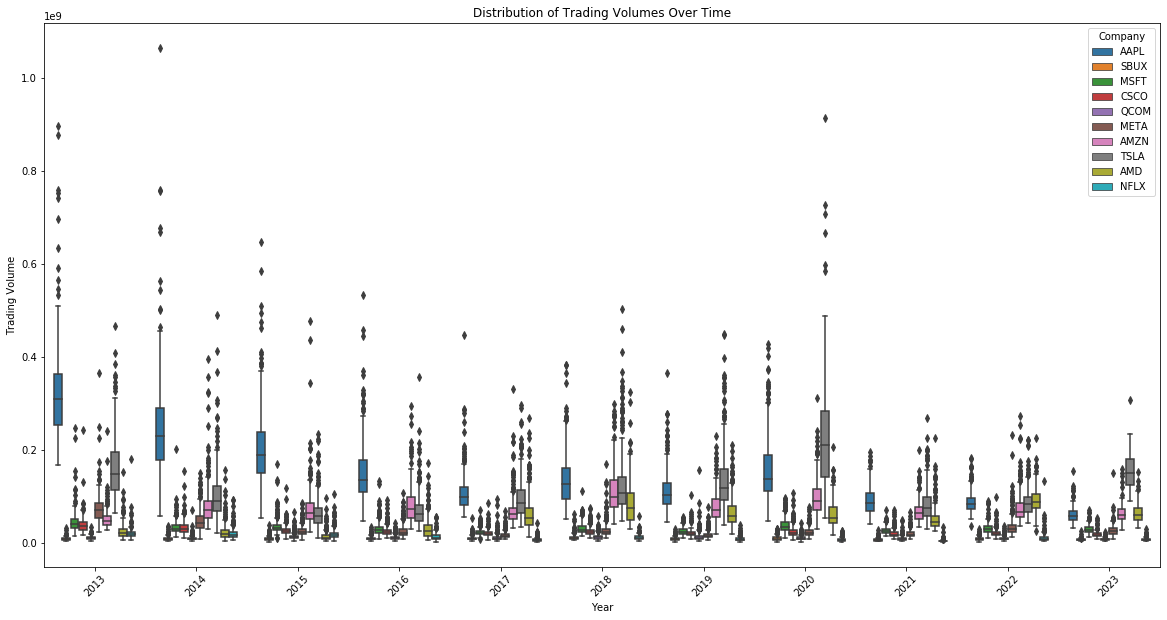

In [12]:
# Step 2: Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

if 'Close/Last' in df.columns:
    # Step 3: Analyze the distribution of stock prices over time
    plt.figure(figsize=(20, 10))
    sns.boxplot(x='Year', y='Close/Last', hue='Company', data=df)
    plt.title('Distribution of Stock Prices Over Time')
    plt.xlabel('Year')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend(title='Company')
    plt.show()
else:
    print("Column 'Last' does not exist in the DataFrame.")

# Check if the 'Volume' column exists in the DataFrame
if 'Volume' in df.columns:
    # Step 4: Analyze the distribution of trading volumes over time
    plt.figure(figsize=(20, 10))
    sns.boxplot(x='Year', y='Volume', hue='Company', data=df)
    plt.title('Distribution of Trading Volumes Over Time')
    plt.xlabel('Year')
    plt.ylabel('Trading Volume')
    plt.xticks(rotation=45)
    plt.legend(title='Company')
    plt.show()
else:
    print("Column 'Volume' does not exist in the DataFrame.")

In [13]:
#df.drop(columns=["Company"], inplace=True)
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Year
0,AAPL,2023-07-17,193.99,50520160,191.90,194.3200,191.81,2023
1,AAPL,2023-07-14,190.69,41616240,190.23,191.1799,189.63,2023
2,AAPL,2023-07-13,190.54,41342340,190.50,191.1900,189.78,2023
3,AAPL,2023-07-12,189.77,60750250,189.68,191.7000,188.47,2023
4,AAPL,2023-07-11,188.08,46638120,189.16,189.3000,186.60,2023


In [14]:
df['Month'] = df['Date'].dt.month

In [15]:
df

,Company,Date,Close/Last,Volume,Open,High,Low,Year,Month
0,AAPL,2023-07-17,193.9900,50520160,191.9000,194.3200,191.8100,2023,7
1,AAPL,2023-07-14,190.6900,41616240,190.2300,191.1799,189.6300,2023,7
2,AAPL,2023-07-13,190.5400,41342340,190.5000,191.1900,189.7800,2023,7
3,AAPL,2023-07-12,189.7700,60750250,189.6800,191.7000,188.4700,2023,7
4,AAPL,2023-07-11,188.0800,46638120,189.1600,189.3000,186.6000,2023,7
...,...,...,...,...,...,...,...,...,...
25155,NFLX,2013-07-24,34.4714,33395351,35.6743,36.0357,34.3143,2013,7
25156,NFLX,2013-07-23,35.7514,76792963,35.9143,37.4621,35.1714,2013,7
25157,NFLX,2013-07-22,37.4228,44791095,38.1214,38.3928,36.7314,2013,7
25158,NFLX,2013-07-19,37.7966,18098750,38.2043,38.2784,37.5971,2013,7


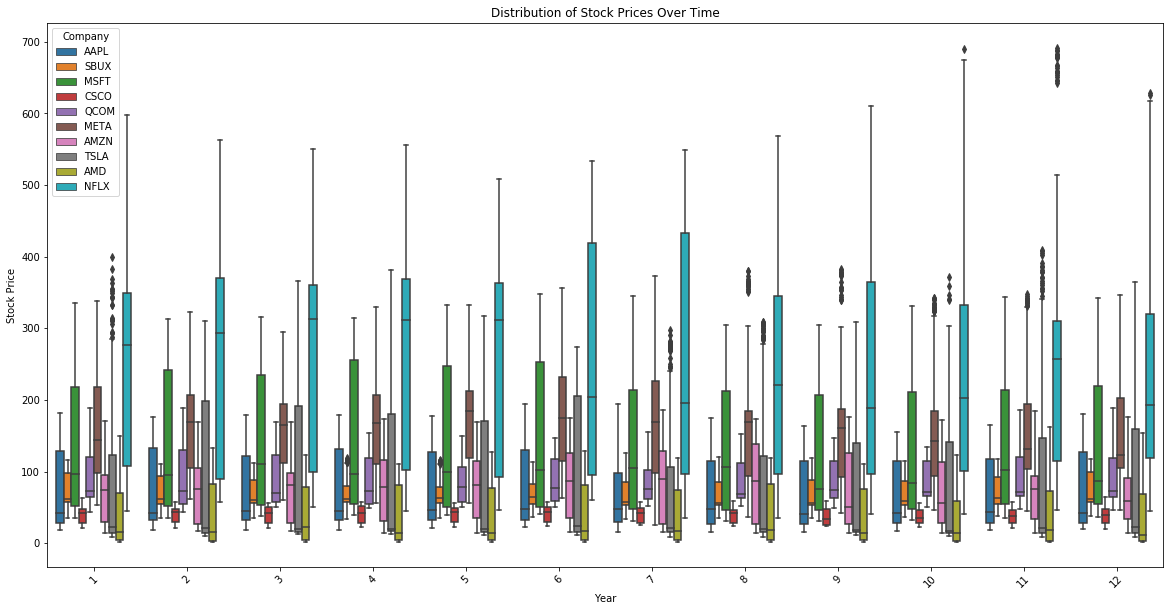

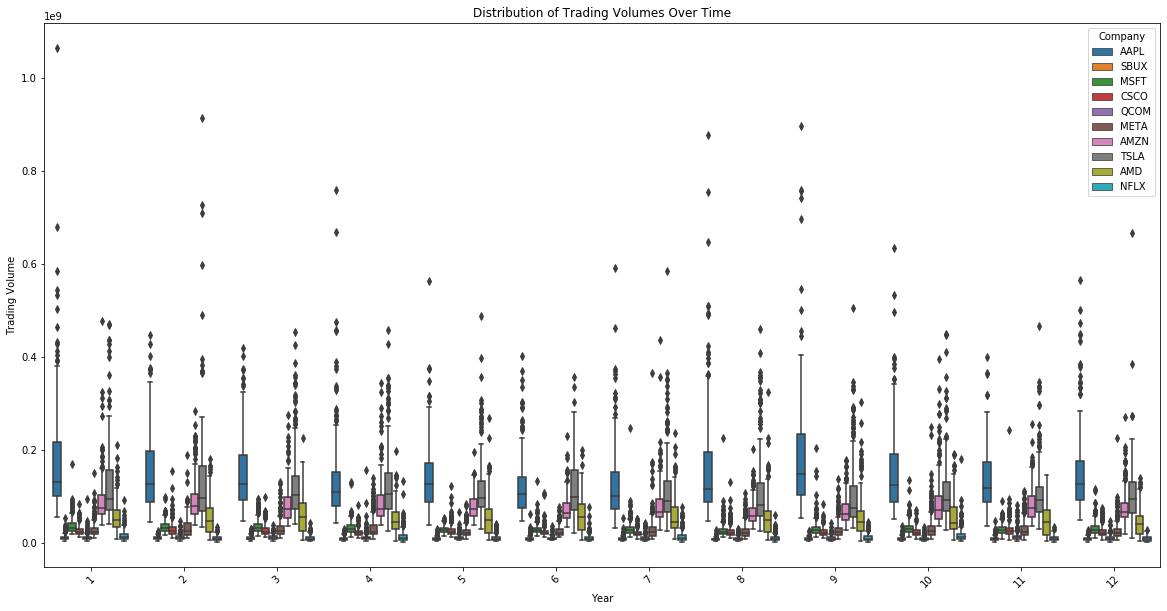

In [16]:
# Step 2: Extract the year from the 'Date' column
#df['Year'] = df['Date'].dt.year

if 'Close/Last' in df.columns:
    # Step 3: Analyze the distribution of stock prices over time
    plt.figure(figsize=(20, 10))
    sns.boxplot(x='Month', y='Close/Last', hue='Company', data=df)
    plt.title('Distribution of Stock Prices Over Time')
    plt.xlabel('Year')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend(title='Company')
    plt.show()
else:
    print("Column 'Last' does not exist in the DataFrame.")

# Check if the 'Volume' column exists in the DataFrame
if 'Volume' in df.columns:
    # Step 4: Analyze the distribution of trading volumes over time
    plt.figure(figsize=(20, 10))
    sns.boxplot(x='Month', y='Volume', hue='Company', data=df)
    plt.title('Distribution of Trading Volumes Over Time')
    plt.xlabel('Year')
    plt.ylabel('Trading Volume')
    plt.xticks(rotation=45)
    plt.legend(title='Company')
    plt.show()
else:
    print("Column 'Volume' does not exist in the DataFrame.")

In [17]:
def analyze_stock_Year(df, company_name):
    company_df = df[df['Company'] == company_name]
    # Step 3: Analyze the distribution of stock prices over time
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Close/Last', data=company_df)
    plt.title(f'Distribution of Stock Prices for {company_name} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.show()
    # Step 4: Analyze the distribution of trading volumes over time
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Volume', data=company_df)
    plt.title(f'Distribution of Trading Volumes for {company_name} Over Time')
    plt.xlabel('Month')
    plt.ylabel('Trading Volume')
    plt.xticks(rotation=45)
    plt.show()
    
def analyze_stock_Month(df, company_name):
    company_df = df[df['Company'] == company_name]
    # Step 3: Analyze the distribution of stock prices over time
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Close/Last', data=company_df)
    plt.title(f'Distribution of Stock Prices for {company_name} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.show()
    # Step 4: Analyze the distribution of trading volumes over time
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Volume', data=company_df)
    plt.title(f'Distribution of Trading Volumes for {company_name} Over Time')
    plt.xlabel('Month')
    plt.ylabel('Trading Volume')
    plt.xticks(rotation=45)
    plt.show()

# Assuming you have a DataFrame named 'df' with columns: 'Date', 'Company', 'Last', and 'Volume'
# where 'Date' is the timestamp, 'Company' is the company name, 'Last' is the stock price, and 'Volume' is the trading volume.

# Specify the company name to analyze


# Call the function to analyze the stock data for the specific company


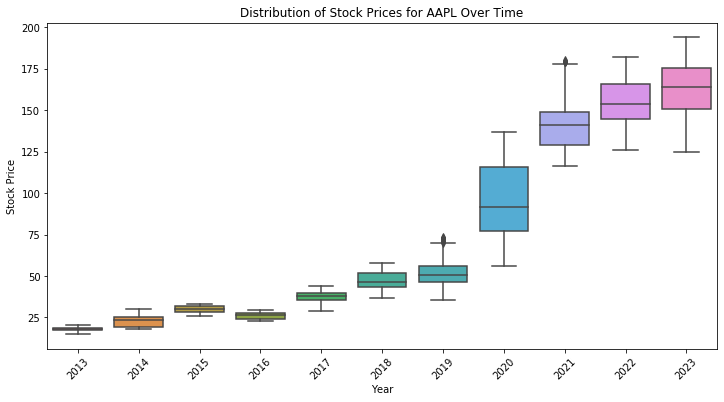

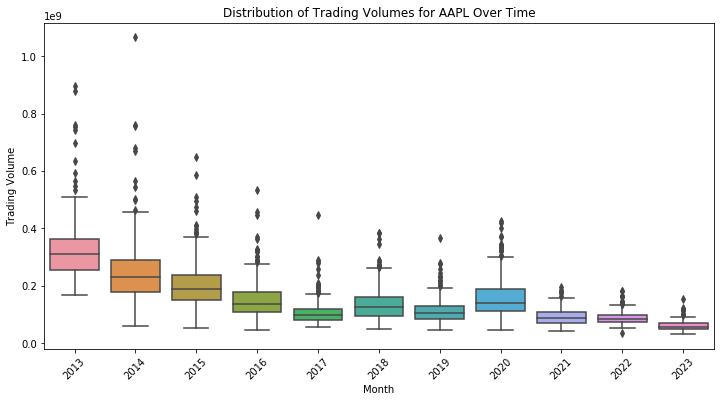

In [18]:
company_name = 'AAPL' #change the stock prize to see the trend for other stocks
analyze_stock_Year(df, company_name)

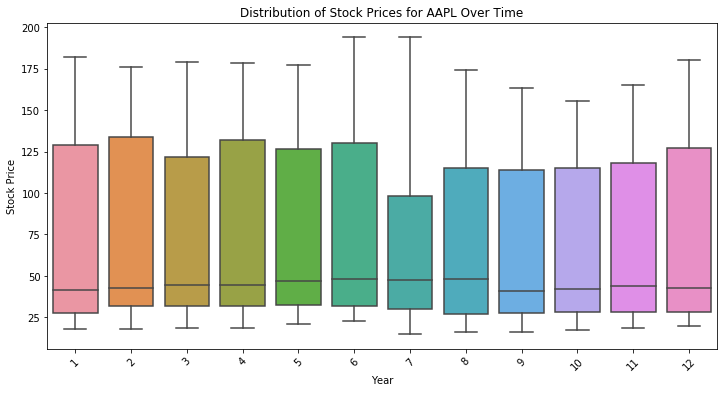

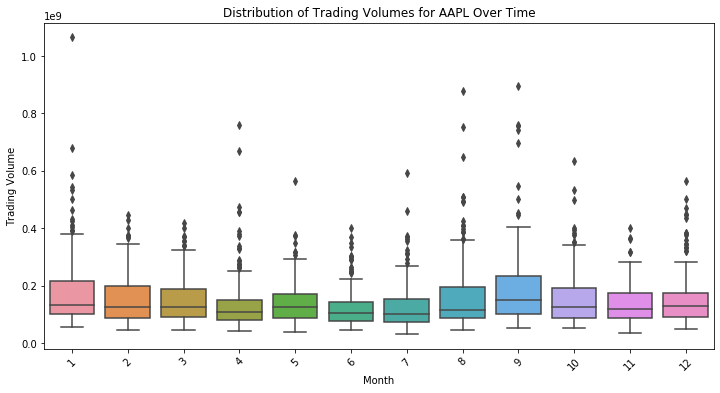

In [19]:
company_name = 'AAPL'
analyze_stock_Month(df, company_name)

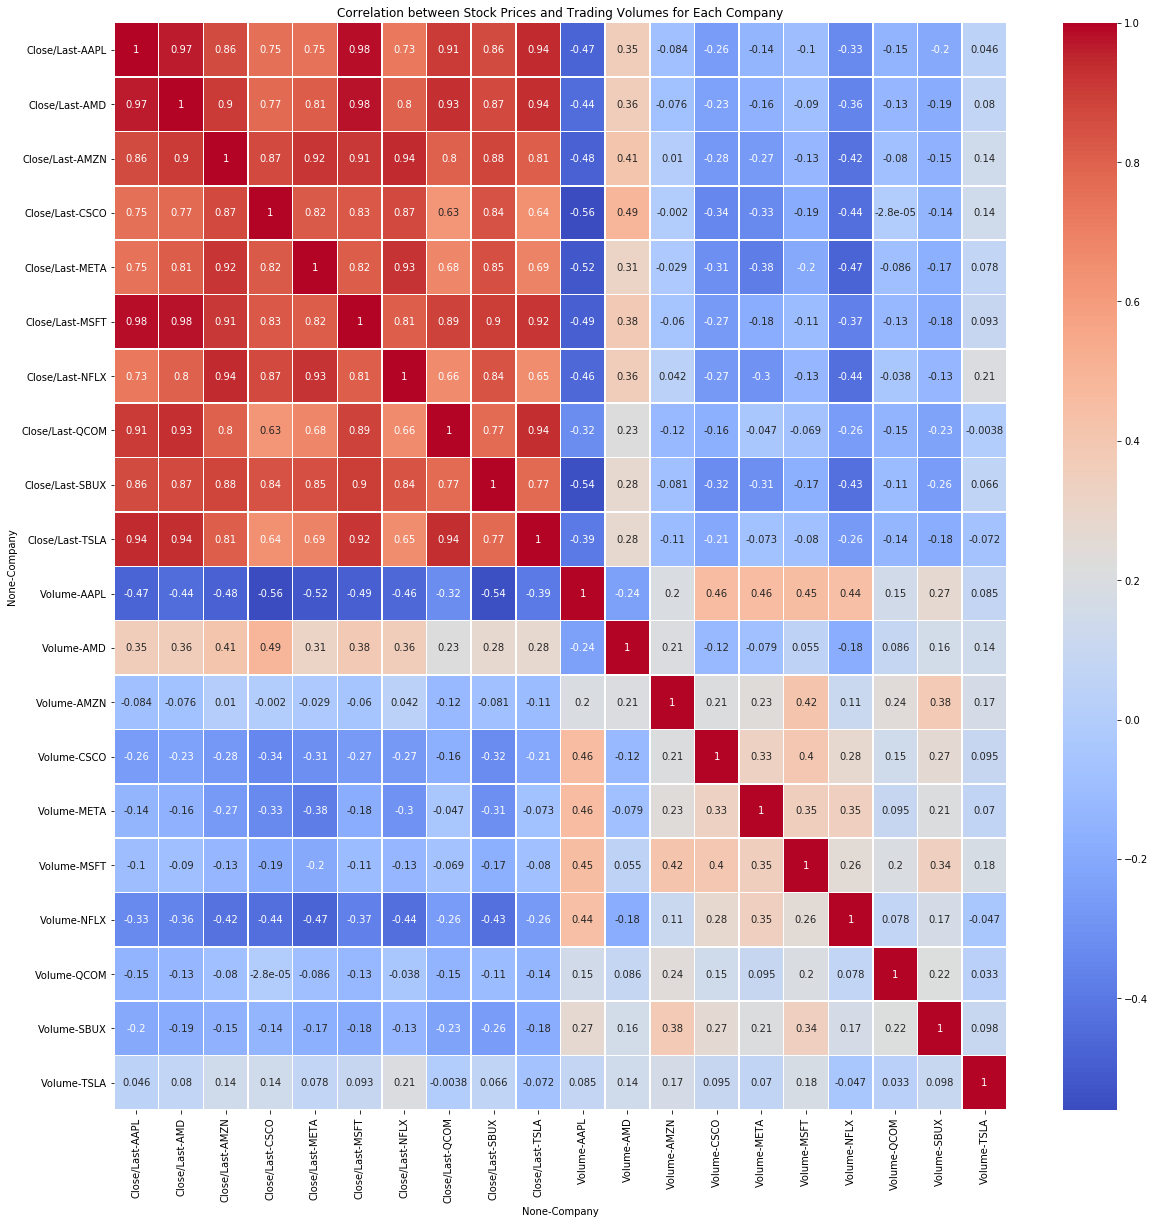

In [20]:
def correlation_lost(df):
    # Step 1: Pivot the DataFrame to have 'Company' as columns and 'Last' and 'Volume' as values
    pivot_df = df.pivot(index='Date', columns='Company', values=['Close/Last', 'Volume'])
    # Step 2: Calculate the correlation matrix
    corr_matrix = pivot_df.corr()
    # Step 3: Plot the correlation heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock Prices and Trading Volumes for Each Company')
    plt.show()
correlation_lost(df)

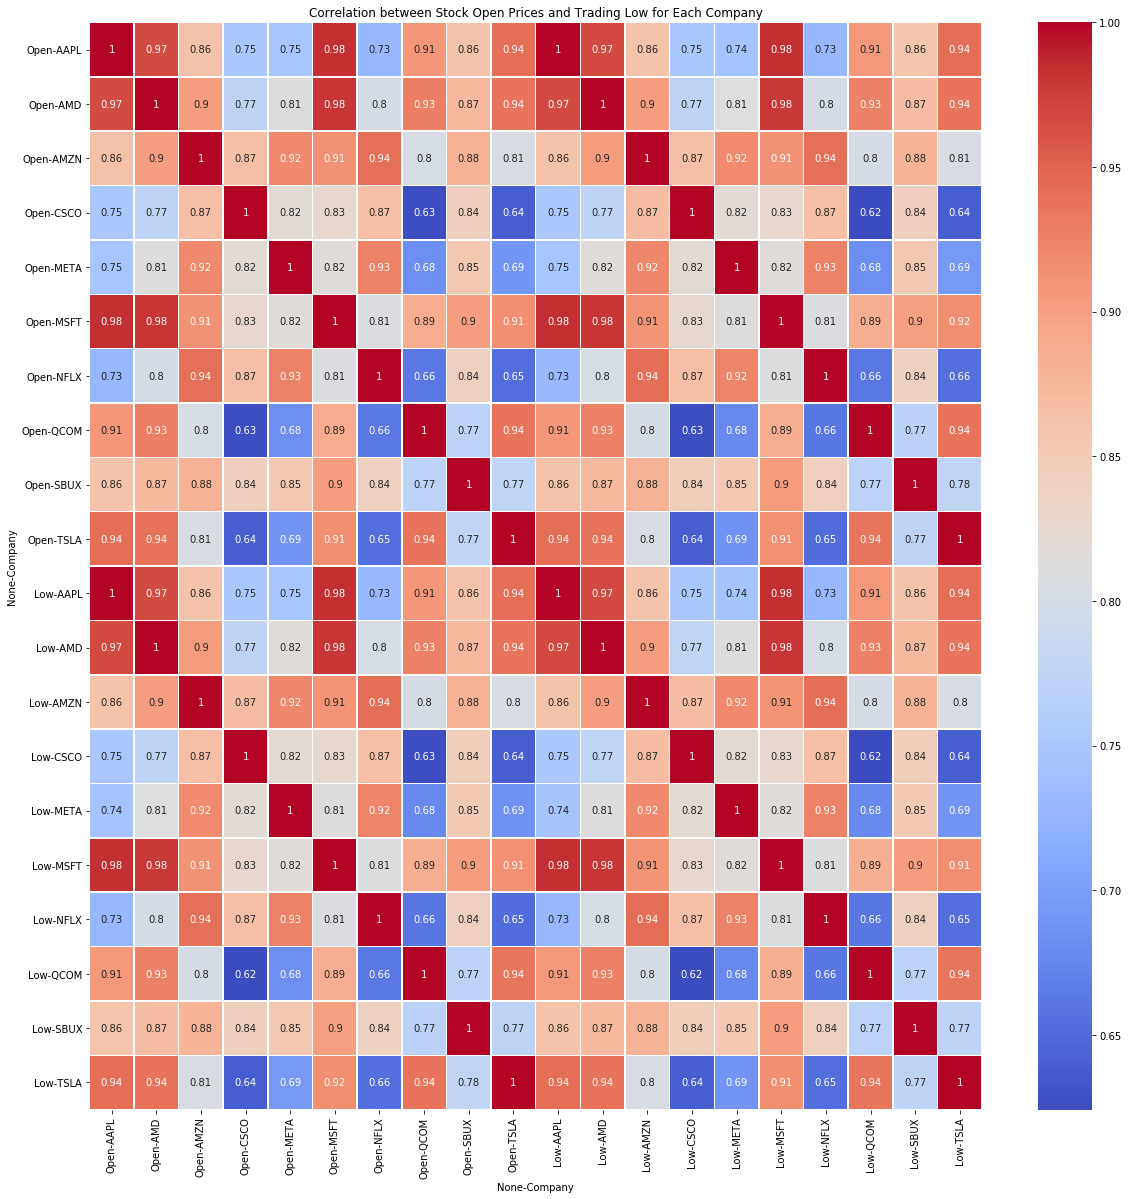

In [21]:
def correlation_open(df):
    #Pivot the DataFrame to have 'Company' as columns and 'Last' and 'Volume' as values
    pivot_df = df.pivot(index='Date', columns='Company', values=['Open', 'Low'])
    #Calculate the correlation matrix
    corr_matrix = pivot_df.corr()
    #Plot the correlation heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock Open Prices and Trading Low for Each Company')
    plt.show()
correlation_open(df)

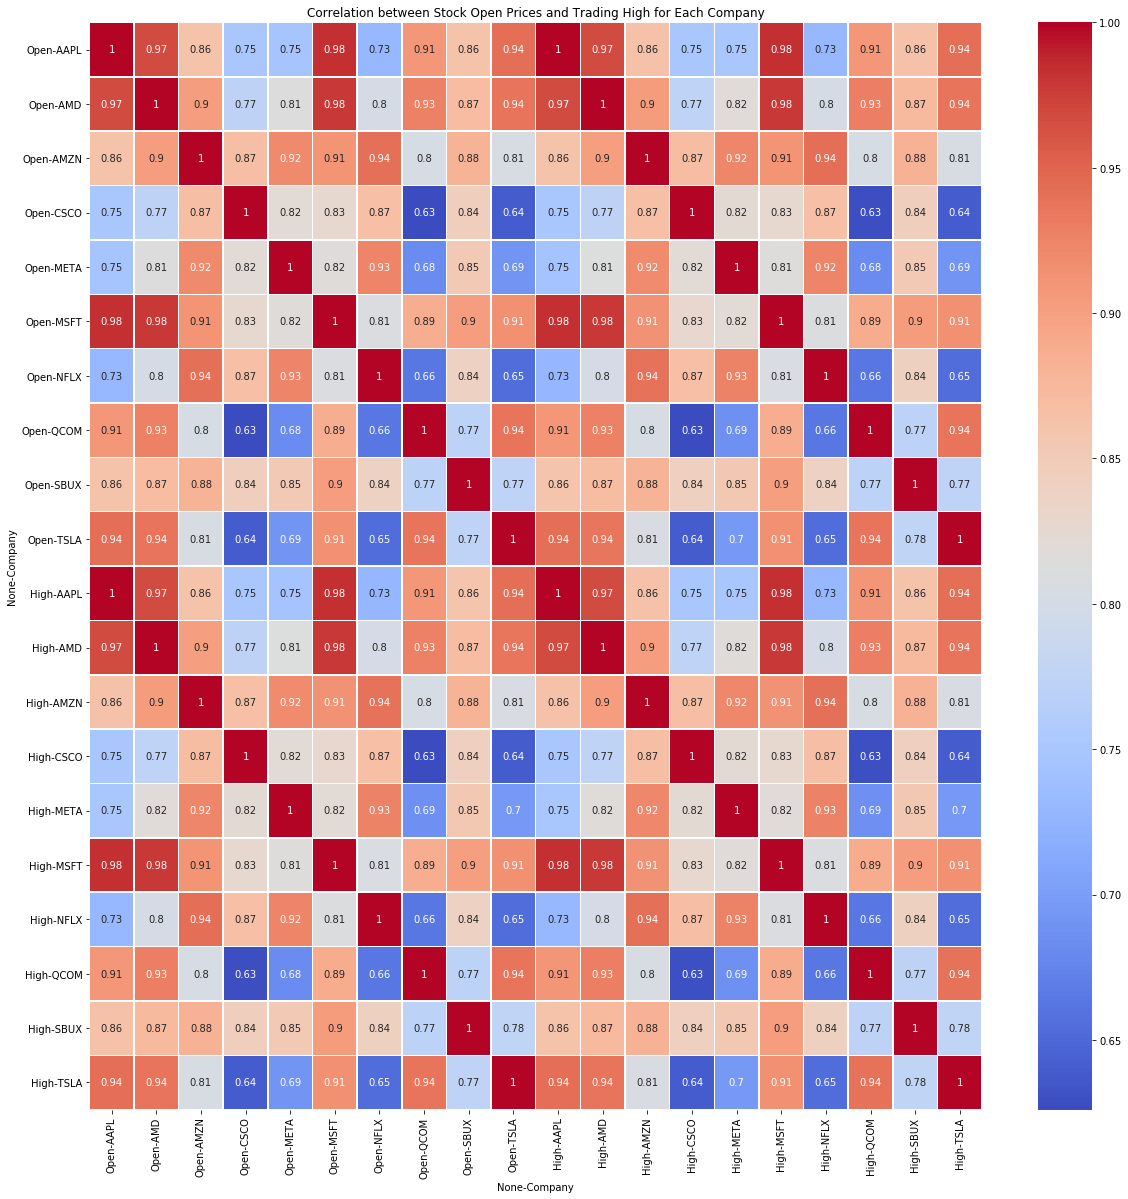

In [22]:
def correlation_open(df):
    #Pivot the DataFrame to have 'Company' as columns and 'Last' and 'Volume' as values
    pivot_df = df.pivot(index='Date', columns='Company', values=['Open', 'High'])
    #Calculate the correlation matrix
    corr_matrix = pivot_df.corr()
    #Plot the correlation heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock Open Prices and Trading High for Each Company')
    plt.show()
correlation_open(df)

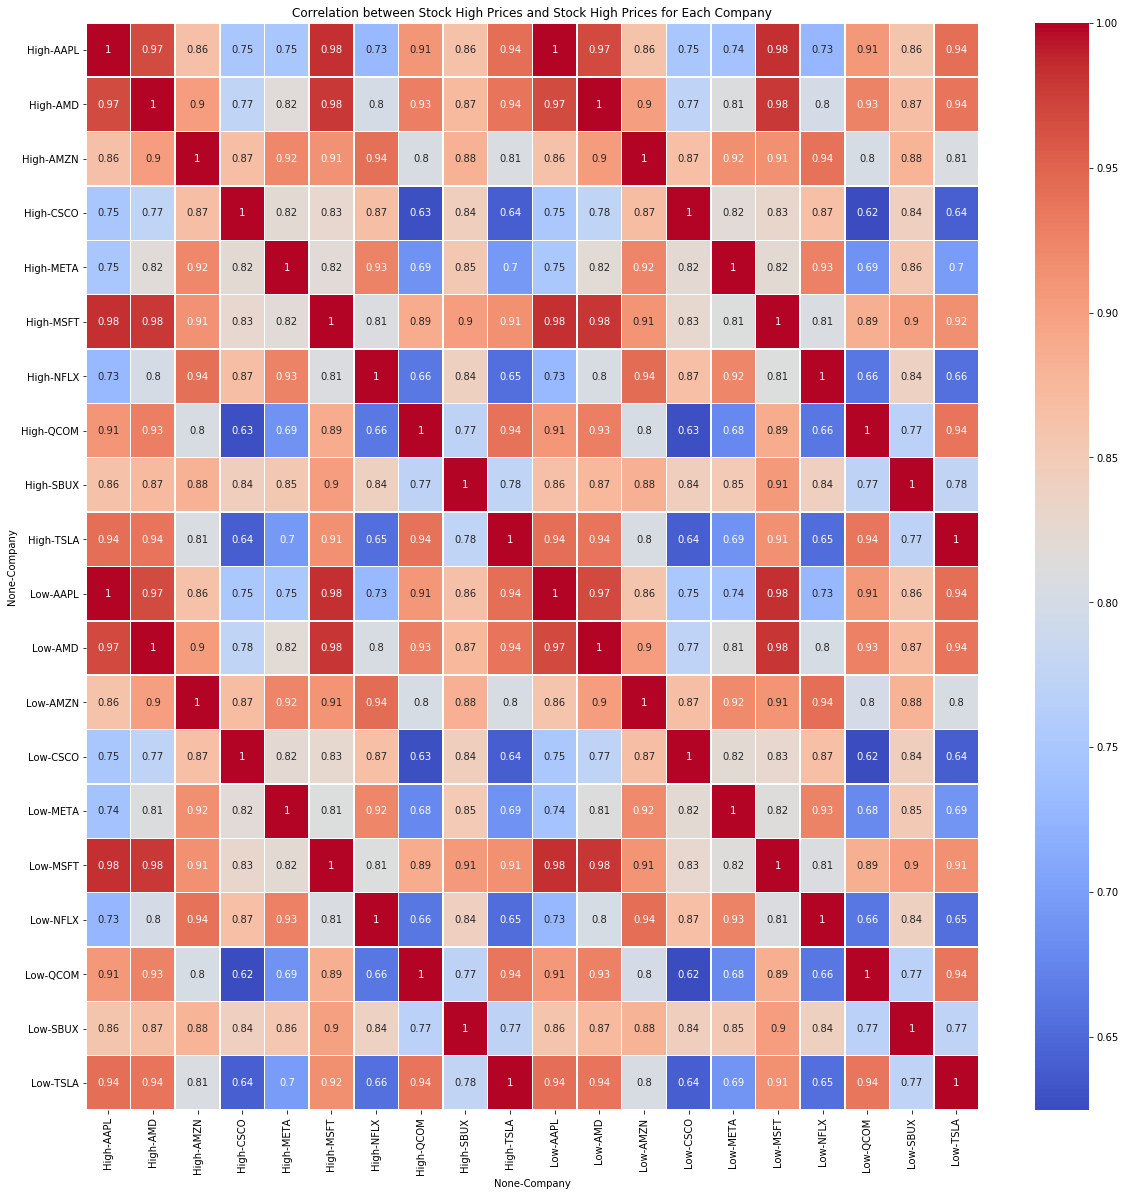

In [23]:
def correlation_open(df):
    # Pivot the DataFrame to have 'Company' as columns and 'Last' and 'Volume' as values
    pivot_df = df.pivot(index='Date', columns='Company', values=['High', 'Low'])
    #Calculate the correlation matrix
    corr_matrix = pivot_df.corr()
    # Plot the correlation heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock High Prices and Stock High Prices for Each Company')
    plt.show()
correlation_open(df)

In [24]:
# Create a new column for the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

#df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)

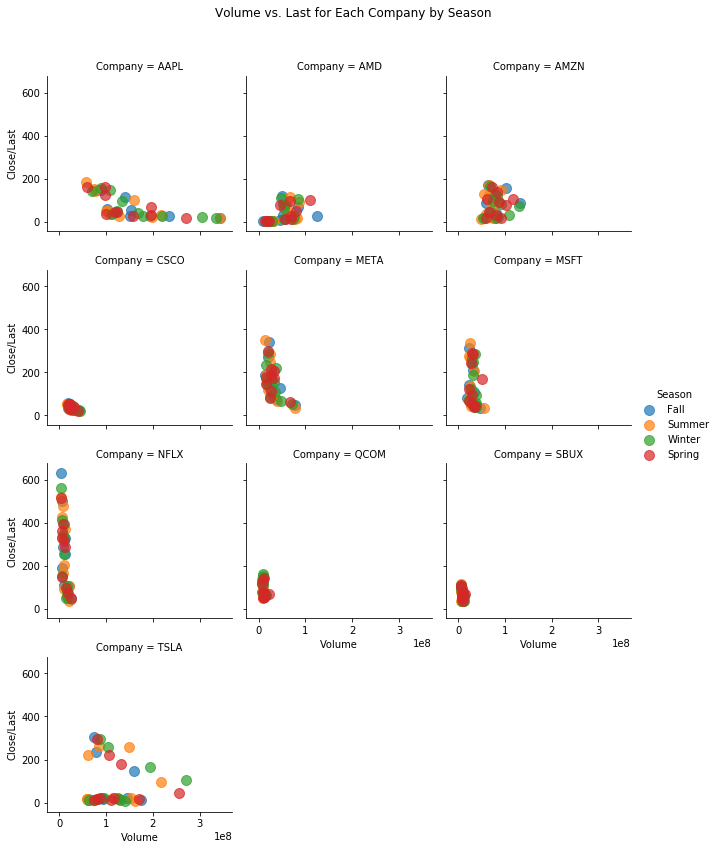

In [25]:
# Step 2: Group the data and calculate the mean 'Volume' and 'Last' for each company, year, and season
seasonal_data = df.groupby(['Company', 'Year', 'Season']).mean().reset_index()

# Step 3: Create scatter plots for each company, with 'Volume' on the x-axis and 'Last' on the y-axis, and color points based on the season
g = sns.FacetGrid(seasonal_data, col='Company', hue='Season', col_wrap=3)
g.map(plt.scatter, 'Volume', 'Close/Last', alpha=0.7, s=100)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Volume vs. Last for Each Company by Season')
plt.show()

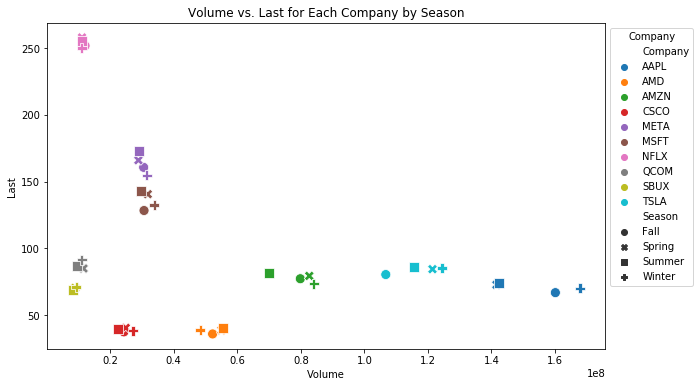

In [26]:
mean_data = seasonal_data.groupby(['Company', 'Season']).mean().reset_index()



plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x='Volume', y='Close/Last', hue='Company', style='Season', s=100)

plt.title('Volume vs. Last for Each Company by Season')
plt.xlabel('Volume')
plt.ylabel('Last')
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

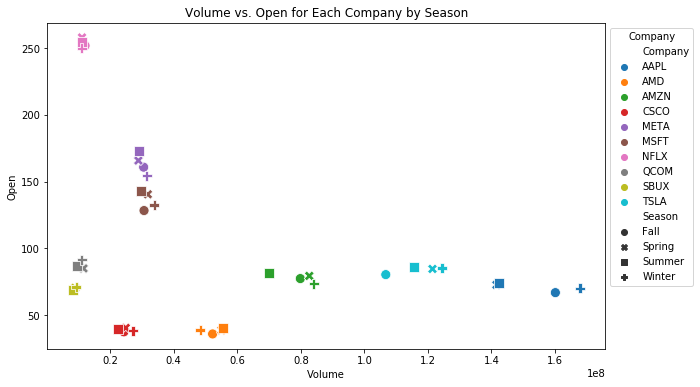

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x='Volume', y='Open', hue='Company', style='Season', s=100)

plt.title('Volume vs. Open for Each Company by Season')
plt.xlabel('Volume')
plt.ylabel('Open')
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

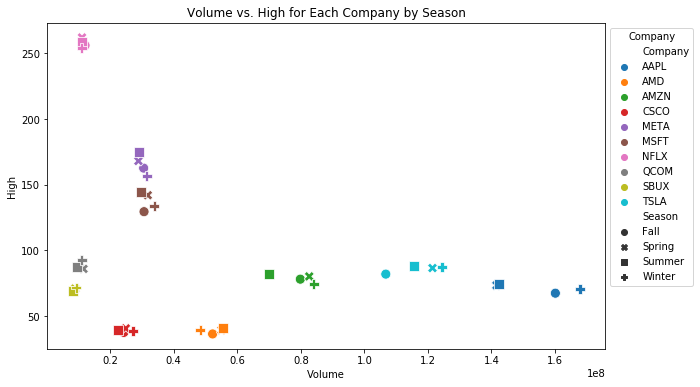

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x='Volume', y='High', hue='Company', style='Season', s=100)

plt.title('Volume vs. High for Each Company by Season')
plt.xlabel('Volume')
plt.ylabel('High')
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

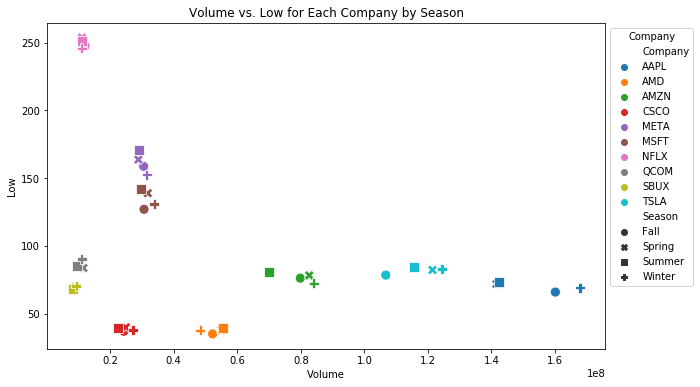

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x='Volume', y='Low', hue='Company', style='Season', s=100)

plt.title('Volume vs. Low for Each Company by Season')
plt.xlabel('Volume')
plt.ylabel('Low')
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

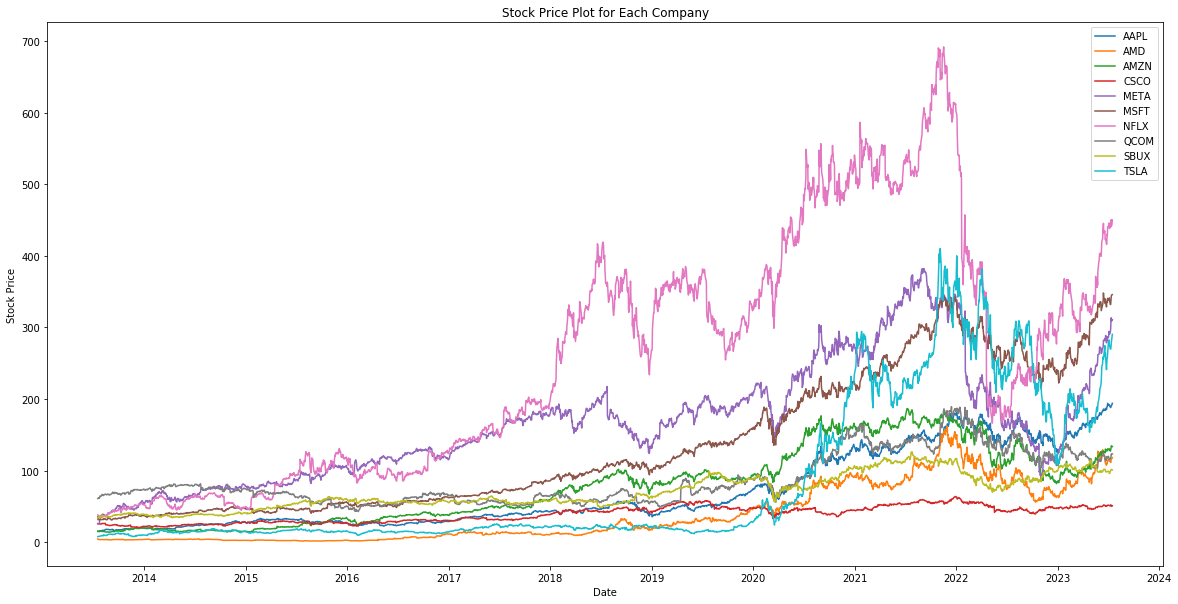

In [30]:
#df['Date'] = pd.to_datetime(df['Date'])

# Plot each company separately
plt.figure(figsize=(20, 10))

for company, group in df.groupby('Company'):
    plt.plot(group['Date'], group['Close/Last'], label=company)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Plot for Each Company')
plt.legend()
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Create a new DataFrame to store the scaled data
scaled_df = pd.DataFrame()

# Apply MinMaxScaler separately for each company
scaler = MinMaxScaler(feature_range=(0, 1))

for company, group in df.groupby('Company'):
    scaled_data = scaler.fit_transform(np.array(group['Close/Last']).reshape(-1, 1))
    scaled_df[company] = scaled_data.flatten()

print(scaled_df)


          AAPL       AMD      AMZN      CSCO      META      MSFT      NFLX  \
0     1.000000  0.728055  0.692736  0.699222  0.799157  0.992522  0.632329   
1     0.981567  0.713207  0.699227  0.689387  0.794246  0.990976  0.619944   
2     0.980729  0.713083  0.697025  0.715691  0.806988  0.982836  0.632831   
3     0.976428  0.704723  0.676738  0.697621  0.795565  0.965610  0.623200   
4     0.966988  0.684385  0.665029  0.729186  0.764552  0.950686  0.617357   
...        ...       ...       ...       ...       ...       ...       ...   
2511  0.004293  0.012540  0.005220  0.122370  0.001765  0.002549  0.000000   
2512  0.000000  0.012727  0.005834  0.121683  0.000699  0.002108  0.001948   
2513  0.001461  0.014224  0.006535  0.125343  0.000460  0.002707  0.004491   
2514  0.001189  0.015035  0.007042  0.127630  0.000000  0.000782  0.005060   
2515  0.002547  0.018841  0.006718  0.128545  0.000839  0.013529  0.005458   

          QCOM      SBUX      TSLA  
0     0.549754  0.729071  

In [32]:
# Perform train-test split for each company
train_data_list = []
test_data_list = []

for company, group in df.groupby('Company'):
    training_size = int(len(group) * 0.75)
    train_data = group[:training_size]
    test_data = group[training_size:]
    train_data_list.append(train_data)
    test_data_list.append(test_data)

# Concatenate the train and test data for all companies
train_data = pd.concat(train_data_list)
test_data = pd.concat(test_data_list)

print("Train Data:")
print(train_data)
print("\nTest Data:")
print(test_data)

Train Data:
      Company       Date  Close/Last    Volume      Open      High       Low  \
0        AAPL 2023-07-17    193.9900  50520160  191.9000  194.3200  191.8100   
1        AAPL 2023-07-14    190.6900  41616240  190.2300  191.1799  189.6300   
2        AAPL 2023-07-13    190.5400  41342340  190.5000  191.1900  189.7800   
3        AAPL 2023-07-12    189.7700  60750250  189.6800  191.7000  188.4700   
4        AAPL 2023-07-11    188.0800  46638120  189.1600  189.3000  186.6000   
...       ...        ...         ...       ...       ...       ...       ...   
19494    TSLA 2016-01-22     13.5033  46830967   13.6534   13.7000   13.2687   
19495    TSLA 2016-01-21     13.3313  47466336   13.4367   13.5487   13.0013   
19496    TSLA 2016-01-20     13.2467  87391606   13.2933   13.4187   12.7500   
19497    TSLA 2016-01-19     13.6480  60469035   13.9140   14.0313   13.3853   
19498    TSLA 2016-01-15     13.6660  79886555   13.2647   13.6713   13.1500   

       Year  Month  Season 

In [33]:
# Perform create_features for each company
time_step = 1
features_list = []

def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

for company, group in df.groupby('Company'):
    dataset = group[['Close/Last']].values
    dataX, dataY = create_features(dataset, time_step)
    features_list.append((dataX, dataY))

# Print the features for each company
for i, (dataX, dataY) in enumerate(features_list):
    print(f"\nFeatures for Company {i+1}:")
    print("dataX:")
    print(dataX)
    print("dataY:")
    print(dataY)


Features for Company 1:
dataX:
[[193.99  ]
 [190.69  ]
 [190.54  ]
 ...
 [ 15.7325]
 [ 14.9639]
 [ 15.2254]]
dataY:
[190.69   190.54   189.77   ...  14.9639  15.2254  15.1768]

Features for Company 2:
dataX:
[[118.32]
 [115.94]
 [115.92]
 ...
 [  3.63]
 [  3.66]
 [  3.9 ]]
dataY:
[115.94 115.92 114.58 ...   3.66   3.9    4.03]

Features for Company 3:
dataX:
[[133.56 ]
 [134.68 ]
 [134.3  ]
 ...
 [ 14.947]
 [ 15.053]
 [ 15.174]]
dataY:
[134.68   134.3    130.8    ...  15.053   15.174   15.2615]

Features for Company 4:
dataX:
[[50.81]
 [50.38]
 [51.53]
 ...
 [25.59]
 [25.56]
 [25.72]]
dataY:
[50.38 51.53 50.74 ... 25.56 25.72 25.82]

Features for Company 5:
dataX:
[[310.62 ]
 [308.87 ]
 [313.41 ]
 ...
 [ 26.51 ]
 [ 26.13 ]
 [ 26.045]]
dataY:
[308.87  313.41  309.34  ...  26.13   26.045  25.881]

Features for Company 6:
dataX:
[[345.73]
 [345.24]
 [342.66]
 ...
 [ 31.96]
 [ 31.82]
 [ 32.01]]
dataY:
[345.24 342.66 337.2  ...  31.82  32.01  31.4 ]

Features for Company 7:
dataX:
[[450.05

In [34]:
# Assuming you have already created the features_list using the previous code

ts = 100
X_train_list, y_train_list, X_test_list, y_test_list = [], [], [], []

for dataX, dataY in features_list:
    # Split the data into train and test sets
    training_size = int(len(dataX) * 0.75)
    X_train, y_train = dataX[:training_size], dataY[:training_size]
    X_test, y_test = dataX[training_size:], dataY[training_size:]
    
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

# Print the train and test datasets for each company
for i, (X_train, y_train, X_test, y_test) in enumerate(zip(X_train_list, y_train_list, X_test_list, y_test_list)):
    print(f"\nTrain data for Company {i+1}:")
    print("X_train:")
    print(X_train)
    print("y_train:")
    print(y_train)
    print(f"Test data for Company {i+1}:")
    print("X_test:")
    print(X_test)
    print("y_test:")
    print(y_test)



Train data for Company 1:
X_train:
[[193.99  ]
 [190.69  ]
 [190.54  ]
 ...
 [ 25.355 ]
 [ 24.075 ]
 [ 24.1975]]
y_train:
[190.69   190.54   189.77   ...  24.075   24.1975  24.165 ]
Test data for Company 1:
X_test:
[[24.165 ]
 [24.2825]
 [24.88  ]
 [24.3475]
 [24.99  ]
 [24.6325]
 [24.24  ]
 [24.1125]
 [25.175 ]
 [25.6775]
 [26.3375]
 [26.315 ]
 [26.83  ]
 [27.185 ]
 [26.705 ]
 [27.0075]
 [27.1525]
 [26.8075]
 [26.8325]
 [26.5075]
 [27.245 ]
 [27.835 ]
 [27.6225]
 [28.12  ]
 [28.295 ]
 [29.0425]
 [28.905 ]
 [29.5575]
 [29.57  ]
 [29.7575]
 [28.8   ]
 [29.07  ]
 [29.335 ]
 [29.575 ]
 [29.4525]
 [29.5075]
 [29.72  ]
 [29.4375]
 [29.825 ]
 [29.695 ]
 [29.3225]
 [28.4225]
 [28.5437]
 [28.085 ]
 [28.93  ]
 [29.0275]
 [29.1925]
 [30.1425]
 [30.265 ]
 [30.23  ]
 [30.5   ]
 [30.6425]
 [30.295 ]
 [29.875 ]
 [30.1325]
 [29.8175]
 [28.6375]
 [28.82  ]
 [29.77  ]
 [28.875 ]
 [28.44  ]
 [28.4425]
 [27.9325]
 [27.76  ]
 [27.965 ]
 [27.5525]
 [27.9475]
 [27.9   ]
 [28.03  ]
 [27.375 ]
 [27.695 ]
 [2

 [34.51  ]]
y_test:
[58.     58.98   57.87   59.46   57.82   56.63   56.69   58.13   58.65
 58.26   60.03   60.82   61.13   60.19   60.32   60.34   59.99   59.54
 58.62   59.515  60.35   59.98   59.92   59.82   61.87   61.18   62.16
 61.89   61.75   59.55   61.22   61.37   61.39   62.18   62.19   61.96
 62.64   61.99   61.46   61.8    60.55   60.68   59.74   61.07   61.87
 62.18   61.34   61.97   62.28   61.96   62.8    62.24   62.57   62.5
 63.51   62.71   63.43   62.61   61.49   60.53   60.88   60.97   59.93
 59.69   58.82   60.16   60.54   60.07   59.46   58.78   58.69   59.04
 58.08   57.48   56.84   55.72   55.77   57.99   58.37   57.79   57.12
 57.54   56.84   57.28   57.26   56.91   56.29   56.53   55.37   54.69
 55.21   54.28   54.69   55.26   53.5    54.71   55.63   55.95   53.96
 51.09   50.34   52.84   55.81   57.59   57.83   57.74   57.1    56.85
 56.38   56.35   56.27   57.2    57.23   59.01   58.7    58.19   57.93
 58.06   57.51   57.14   56.98   57.29   56.56   56.69   5

In [35]:
ts = 100
X_train_dict = {}
y_train_dict = {}
X_test_dict = {}
y_test_dict = {}

for i, (dataX, dataY) in enumerate(features_list):
    # Split the data into train and test sets
    training_size = int(len(dataX) * 0.75)
    X_train, y_train = dataX[:training_size], dataY[:training_size]
    X_test, y_test = dataX[training_size:], dataY[training_size:]
    
    # Store the data and labels for each company in dictionaries
    X_train_dict[f"Company {i+1}"] = X_train
    y_train_dict[f"Company {i+1}"] = y_train
    X_test_dict[f"Company {i+1}"] = X_test
    y_test_dict[f"Company {i+1}"] = y_test

# Print the train and test datasets for each company
for company, X_train in X_train_dict.items():
    print(f"\nTrain data for {company}:")
    print("X_train:")
    print(X_train)
    print("y_train:")
    print(y_train_dict[company])

for company, X_test in X_test_dict.items():
    print(f"\nTest data for {company}:")
    print("X_test:")
    print(X_test)
    print("y_test:")
    print(y_test_dict[company])



Train data for Company 1:
X_train:
[[193.99  ]
 [190.69  ]
 [190.54  ]
 ...
 [ 25.355 ]
 [ 24.075 ]
 [ 24.1975]]
y_train:
[190.69   190.54   189.77   ...  24.075   24.1975  24.165 ]

Train data for Company 2:
X_train:
[[118.32]
 [115.94]
 [115.92]
 ...
 [  2.02]
 [  2.09]
 [  1.8 ]]
y_train:
[115.94 115.92 114.58 ...   2.09   1.8    1.95]

Train data for Company 3:
X_train:
[[133.56  ]
 [134.68  ]
 [134.3   ]
 ...
 [ 29.819 ]
 [ 28.751 ]
 [ 28.5885]]
y_train:
[134.68   134.3    130.8    ...  28.751   28.5885  28.724 ]

Train data for Company 4:
X_train:
[[50.81]
 [50.38]
 [51.53]
 ...
 [23.37]
 [22.9 ]
 [22.9 ]]
y_train:
[50.38 51.53 50.74 ... 22.9  22.9  23.85]

Train data for Company 5:
X_train:
[[310.62]
 [308.87]
 [313.41]
 ...
 [ 97.94]
 [ 94.16]
 [ 94.35]]
y_train:
[308.87 313.41 309.34 ...  94.16  94.35  95.26]

Train data for Company 6:
X_train:
[[345.73]
 [345.24]
 [342.66]
 ...
 [ 52.29]
 [ 50.48]
 [ 50.79]]
y_train:
[345.24 342.66 337.2  ...  50.48  50.79  50.56]

Train dat

  34.359   26.51    26.13    26.045   25.881 ]

Test data for Company 6:
X_test:
[[50.56  ]
 [50.99  ]
 [53.11  ]
 [51.64  ]
 [52.78  ]
 [52.3   ]
 [52.33  ]
 [52.17  ]
 [54.05  ]
 [55.05  ]
 [54.8   ]
 [55.48  ]
 [56.31  ]
 [56.55  ]
 [55.95  ]
 [55.67  ]
 [55.82  ]
 [55.35  ]
 [54.83  ]
 [54.13  ]
 [55.7   ]
 [56.13  ]
 [55.2   ]
 [55.14  ]
 [54.06  ]
 [55.27  ]
 [54.98  ]
 [55.79  ]
 [55.81  ]
 [55.91  ]
 [54.2   ]
 [55.21  ]
 [55.22  ]
 [54.35  ]
 [53.93  ]
 [53.69  ]
 [54.25  ]
 [54.19  ]
 [54.19  ]
 [53.94  ]
 [53.85  ]
 [52.97  ]
 [53.765 ]
 [52.84  ]
 [53.32  ]
 [53.65  ]
 [53.51  ]
 [54.16  ]
 [54.92  ]
 [54.38  ]
 [54.4   ]
 [54.15  ]
 [53.24  ]
 [52.64  ]
 [53.36  ]
 [53.98  ]
 [53.69  ]
 [54.25  ]
 [52.87  ]
 [48.03  ]
 [47.2   ]
 [47.77  ]
 [47.62  ]
 [47.51  ]
 [47.01  ]
 [46.68  ]
 [46.89  ]
 [47.    ]
 [47.11  ]
 [47.45  ]
 [46.8   ]
 [46.75  ]
 [46.63  ]
 [45.57  ]
 [44.61  ]
 [44.26  ]
 [43.44  ]
 [43.29  ]
 [43.94  ]
 [43.91  ]
 [43.87  ]
 [43.9   ]
 [44.11  ]
 [43.4

 64.562 64.51  64.24  64.61  63.42  61.39  62.3   62.21  61.46 ]

Test data for Company 9:
X_test:
[[58.55  ]
 [58.    ]
 [58.98  ]
 [57.87  ]
 [59.46  ]
 [57.82  ]
 [56.63  ]
 [56.69  ]
 [58.13  ]
 [58.65  ]
 [58.26  ]
 [60.03  ]
 [60.82  ]
 [61.13  ]
 [60.19  ]
 [60.32  ]
 [60.34  ]
 [59.99  ]
 [59.54  ]
 [58.62  ]
 [59.515 ]
 [60.35  ]
 [59.98  ]
 [59.92  ]
 [59.82  ]
 [61.87  ]
 [61.18  ]
 [62.16  ]
 [61.89  ]
 [61.75  ]
 [59.55  ]
 [61.22  ]
 [61.37  ]
 [61.39  ]
 [62.18  ]
 [62.19  ]
 [61.96  ]
 [62.64  ]
 [61.99  ]
 [61.46  ]
 [61.8   ]
 [60.55  ]
 [60.68  ]
 [59.74  ]
 [61.07  ]
 [61.87  ]
 [62.18  ]
 [61.34  ]
 [61.97  ]
 [62.28  ]
 [61.96  ]
 [62.8   ]
 [62.24  ]
 [62.57  ]
 [62.5   ]
 [63.51  ]
 [62.71  ]
 [63.43  ]
 [62.61  ]
 [61.49  ]
 [60.53  ]
 [60.88  ]
 [60.97  ]
 [59.93  ]
 [59.69  ]
 [58.82  ]
 [60.16  ]
 [60.54  ]
 [60.07  ]
 [59.46  ]
 [58.78  ]
 [58.69  ]
 [59.04  ]
 [58.08  ]
 [57.48  ]
 [56.84  ]
 [55.72  ]
 [55.77  ]
 [57.99  ]
 [58.37  ]
 [57.79  ]
 [57.12  ]

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Assuming you have already defined X_train_dict and y_train_dict

lstm_models = {}

# Create and train LSTM models for each company
for company, X_train in X_train_dict.items():
    # Reshape X_train to have the shape (number of samples, time steps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    input_shape = (X_train.shape[1], X_train.shape[2])

    # Rest of the code for creating and training the LSTM model
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train_dict[company], epochs=100, batch_size=10, verbose=1)

    # Add the trained LSTM model to the dictionary
    lstm_models[company] = lstm_model

# Print the summary of each LSTM model
for company, lstm_model in lstm_models.items():
    print(f"\nLSTM Model for {company}:")
    lstm_model.summary()


Epoch 1/100
189/189 [==============================] - 5s 4ms/step - loss: 8631.9043
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 7051.2866
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 6159.6216
Epoch 4/100
189/189 [==============================] - 1s 3ms/step - loss: 5440.5474
Epoch 5/100
189/189 [==============================] - 1s 3ms/step - loss: 4851.2349
Epoch 6/100
189/189 [==============================] - 1s 3ms/step - loss: 4369.3286
Epoch 7/100
189/189 [==============================] - 1s 3ms/step - loss: 3977.9695
Epoch 8/100
189/189 [==============================] - 1s 3ms/step - loss: 3636.1824
Epoch 9/100
189/189 [==============================] - 1s 3ms/step - loss: 3119.5054
Epoch 10/100
189/189 [==============================] - 1s 3ms/step - loss: 2743.6531
Epoch 11/100
189/189 [==============================] - 1s 3ms/step - loss: 2407.8770
Epoch 12/100
189/189 [==============================] - 1s 3ms/

189/189 [==============================] - 1s 3ms/step - loss: 5.5833
Epoch 99/100
189/189 [==============================] - 1s 3ms/step - loss: 6.0820
Epoch 100/100
189/189 [==============================] - 1s 3ms/step - loss: 5.8242
Epoch 1/100
189/189 [==============================] - 5s 4ms/step - loss: 3334.7256
Epoch 2/100
189/189 [==============================] - 1s 4ms/step - loss: 2524.4805
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 2085.3188
Epoch 4/100
189/189 [==============================] - 1s 3ms/step - loss: 1736.9980
Epoch 5/100
189/189 [==============================] - 1s 3ms/step - loss: 1448.9790
Epoch 6/100
189/189 [==============================] - 1s 3ms/step - loss: 1209.1698
Epoch 7/100
189/189 [==============================] - 1s 3ms/step - loss: 1007.0207
Epoch 8/100
189/189 [==============================] - 1s 3ms/step - loss: 839.1519
Epoch 9/100
189/189 [==============================] - 1s 3ms/step - loss: 699.6777


189/189 [==============================] - 1s 3ms/step - loss: 6.0582
Epoch 97/100
189/189 [==============================] - 1s 3ms/step - loss: 6.1425
Epoch 98/100
189/189 [==============================] - 1s 3ms/step - loss: 5.6406
Epoch 99/100
189/189 [==============================] - 1s 3ms/step - loss: 6.3957
Epoch 100/100
189/189 [==============================] - 1s 3ms/step - loss: 5.9501
Epoch 1/100
189/189 [==============================] - 5s 4ms/step - loss: 9952.5254
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 8041.9429
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 6957.1753
Epoch 4/100
189/189 [==============================] - 1s 3ms/step - loss: 6056.8325
Epoch 5/100
189/189 [==============================] - 1s 3ms/step - loss: 5295.0620
Epoch 6/100
189/189 [==============================] - 1s 3ms/step - loss: 4650.2080
Epoch 7/100
189/189 [==============================] - 1s 3ms/step - loss: 4107.9229
Ep

189/189 [==============================] - 1s 3ms/step - loss: 8.8068
Epoch 94/100
189/189 [==============================] - 1s 3ms/step - loss: 7.8207
Epoch 95/100
189/189 [==============================] - 1s 3ms/step - loss: 9.1555
Epoch 96/100
189/189 [==============================] - 1s 3ms/step - loss: 9.7030
Epoch 97/100
189/189 [==============================] - 1s 3ms/step - loss: 9.8386
Epoch 98/100
189/189 [==============================] - 1s 3ms/step - loss: 9.1463
Epoch 99/100
189/189 [==============================] - 1s 3ms/step - loss: 9.0572
Epoch 100/100
189/189 [==============================] - 1s 3ms/step - loss: 8.1411
Epoch 1/100
189/189 [==============================] - 5s 4ms/step - loss: 1311.2159
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 674.4816
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 406.7585
Epoch 4/100
189/189 [==============================] - 1s 3ms/step - loss: 248.9925
Epoch 5/100

189/189 [==============================] - 1s 3ms/step - loss: 0.7103
Epoch 92/100
189/189 [==============================] - 1s 3ms/step - loss: 0.7267
Epoch 93/100
189/189 [==============================] - 1s 3ms/step - loss: 0.7176
Epoch 94/100
189/189 [==============================] - 1s 3ms/step - loss: 0.8131
Epoch 95/100
189/189 [==============================] - 1s 3ms/step - loss: 0.6975
Epoch 96/100
189/189 [==============================] - 1s 3ms/step - loss: 0.7207
Epoch 97/100
189/189 [==============================] - 1s 4ms/step - loss: 0.6743
Epoch 98/100
189/189 [==============================] - 1s 3ms/step - loss: 0.7577
Epoch 99/100
189/189 [==============================] - 1s 3ms/step - loss: 0.6410
Epoch 100/100
189/189 [==============================] - 1s 3ms/step - loss: 0.6526
Epoch 1/100
189/189 [==============================] - 5s 4ms/step - loss: 39911.1758
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 35694.8828
Epoch 3/10

189/189 [==============================] - 1s 3ms/step - loss: 56.9810
Epoch 88/100
189/189 [==============================] - 1s 3ms/step - loss: 73.0095
Epoch 89/100
189/189 [==============================] - 1s 3ms/step - loss: 55.6049
Epoch 90/100
189/189 [==============================] - 1s 3ms/step - loss: 59.8635
Epoch 91/100
189/189 [==============================] - 1s 3ms/step - loss: 54.5941
Epoch 92/100
189/189 [==============================] - 1s 3ms/step - loss: 58.0801
Epoch 93/100
189/189 [==============================] - 1s 3ms/step - loss: 61.0504
Epoch 94/100
189/189 [==============================] - 1s 3ms/step - loss: 61.2874
Epoch 95/100
189/189 [==============================] - 1s 3ms/step - loss: 48.3780
Epoch 96/100
189/189 [==============================] - 1s 3ms/step - loss: 51.8852
Epoch 97/100
189/189 [==============================] - 1s 4ms/step - loss: 53.5481
Epoch 98/100
189/189 [==============================] - 1s 3ms/step - loss: 47.8456
Epoch

189/189 [==============================] - 1s 3ms/step - loss: 27.5247
Epoch 84/100
189/189 [==============================] - 1s 3ms/step - loss: 39.7581
Epoch 85/100
189/189 [==============================] - 1s 3ms/step - loss: 30.5360
Epoch 86/100
189/189 [==============================] - 1s 3ms/step - loss: 29.8807
Epoch 87/100
189/189 [==============================] - 1s 3ms/step - loss: 33.1219
Epoch 88/100
189/189 [==============================] - 1s 3ms/step - loss: 29.1717
Epoch 89/100
189/189 [==============================] - 1s 3ms/step - loss: 28.0953
Epoch 90/100
189/189 [==============================] - 1s 3ms/step - loss: 26.3790
Epoch 91/100
189/189 [==============================] - 1s 3ms/step - loss: 21.4227
Epoch 92/100
189/189 [==============================] - 1s 3ms/step - loss: 64.9512
Epoch 93/100
189/189 [==============================] - 1s 3ms/step - loss: 30.2615
Epoch 94/100
189/189 [==============================] - 1s 4ms/step - loss: 26.2754
Epoch

189/189 [==============================] - 1s 3ms/step - loss: 2694.1379
Epoch 79/100
189/189 [==============================] - 1s 3ms/step - loss: 2511.5640
Epoch 80/100
189/189 [==============================] - 1s 3ms/step - loss: 2324.0403
Epoch 81/100
189/189 [==============================] - 1s 3ms/step - loss: 2208.9973
Epoch 82/100
189/189 [==============================] - 1s 3ms/step - loss: 2047.2067
Epoch 83/100
189/189 [==============================] - 1s 3ms/step - loss: 1900.4244
Epoch 84/100
189/189 [==============================] - 1s 3ms/step - loss: 1763.8145
Epoch 85/100
189/189 [==============================] - 1s 3ms/step - loss: 1626.4662
Epoch 86/100
189/189 [==============================] - 1s 3ms/step - loss: 1527.4219
Epoch 87/100
189/189 [==============================] - 1s 3ms/step - loss: 1465.2880
Epoch 88/100
189/189 [==============================] - 1s 3ms/step - loss: 1339.4037
Epoch 89/100
189/189 [==============================] - 1s 3ms/step

189/189 [==============================] - 1s 3ms/step - loss: 8.4572
Epoch 75/100
189/189 [==============================] - 1s 3ms/step - loss: 8.8830
Epoch 76/100
189/189 [==============================] - 1s 3ms/step - loss: 11.0036
Epoch 77/100
189/189 [==============================] - 1s 3ms/step - loss: 9.7107
Epoch 78/100
189/189 [==============================] - 1s 3ms/step - loss: 11.3081
Epoch 79/100
189/189 [==============================] - 1s 3ms/step - loss: 11.1108
Epoch 80/100
189/189 [==============================] - 1s 3ms/step - loss: 8.1633
Epoch 81/100
189/189 [==============================] - 1s 3ms/step - loss: 12.5070
Epoch 82/100
189/189 [==============================] - 1s 3ms/step - loss: 9.3158
Epoch 83/100
189/189 [==============================] - 1s 3ms/step - loss: 9.1933
Epoch 84/100
189/189 [==============================] - 1s 3ms/step - loss: 8.9412
Epoch 85/100
189/189 [==============================] - 1s 3ms/step - loss: 8.6727
Epoch 86/100


189/189 [==============================] - 1s 3ms/step - loss: 2.6839
Epoch 73/100
189/189 [==============================] - 1s 3ms/step - loss: 3.0567
Epoch 74/100
189/189 [==============================] - 1s 3ms/step - loss: 2.8156
Epoch 75/100
189/189 [==============================] - 1s 3ms/step - loss: 2.8542
Epoch 76/100
189/189 [==============================] - 1s 3ms/step - loss: 2.6085
Epoch 77/100
189/189 [==============================] - 1s 3ms/step - loss: 3.1438
Epoch 78/100
189/189 [==============================] - 1s 3ms/step - loss: 2.8910
Epoch 79/100
189/189 [==============================] - 1s 3ms/step - loss: 2.9379
Epoch 80/100
189/189 [==============================] - 1s 3ms/step - loss: 2.6919
Epoch 81/100
189/189 [==============================] - 1s 3ms/step - loss: 2.6589
Epoch 82/100
189/189 [==============================] - 1s 3ms/step - loss: 2.8046
Epoch 83/100
189/189 [==============================] - 1s 3ms/step - loss: 2.7605
Epoch 84/100
189/

189/189 [==============================] - 1s 3ms/step - loss: 158.3535
Epoch 69/100
189/189 [==============================] - 1s 3ms/step - loss: 148.2486
Epoch 70/100
189/189 [==============================] - 1s 3ms/step - loss: 147.4606
Epoch 71/100
189/189 [==============================] - 1s 3ms/step - loss: 136.8662
Epoch 72/100
189/189 [==============================] - 1s 3ms/step - loss: 146.5970
Epoch 73/100
189/189 [==============================] - 1s 3ms/step - loss: 116.3511
Epoch 74/100
189/189 [==============================] - 1s 3ms/step - loss: 115.3401
Epoch 75/100
189/189 [==============================] - 1s 3ms/step - loss: 106.5526
Epoch 76/100
189/189 [==============================] - 1s 3ms/step - loss: 121.9377
Epoch 77/100
189/189 [==============================] - 1s 3ms/step - loss: 99.4061
Epoch 78/100
189/189 [==============================] - 1s 3ms/step - loss: 94.0214
Epoch 79/100
189/189 [==============================] - 1s 3ms/step - loss: 106.

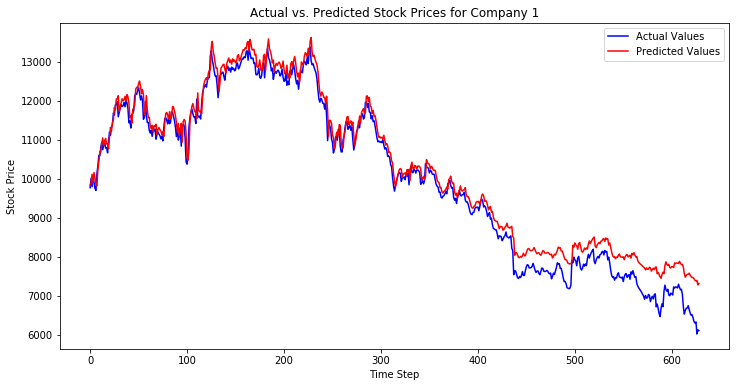

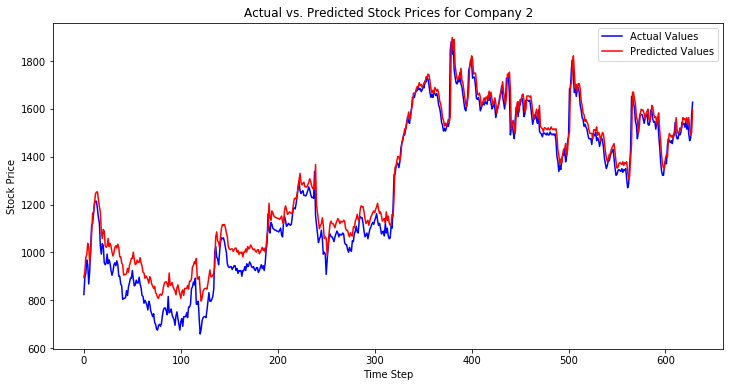

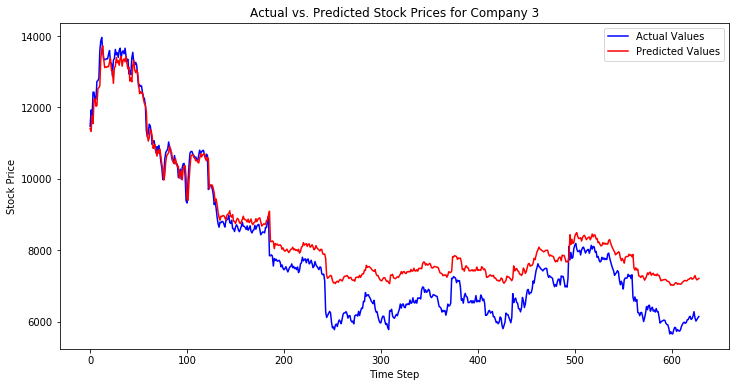

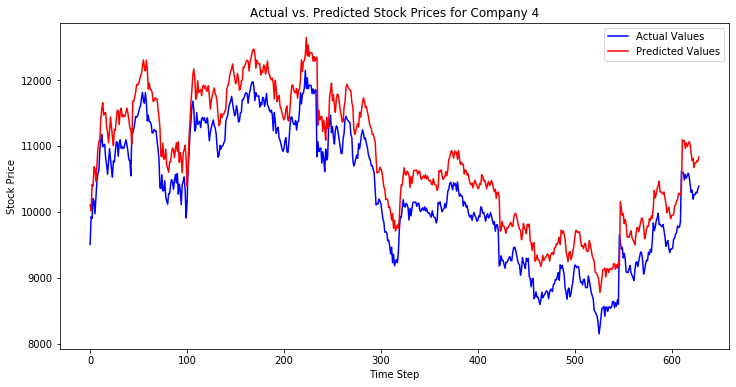

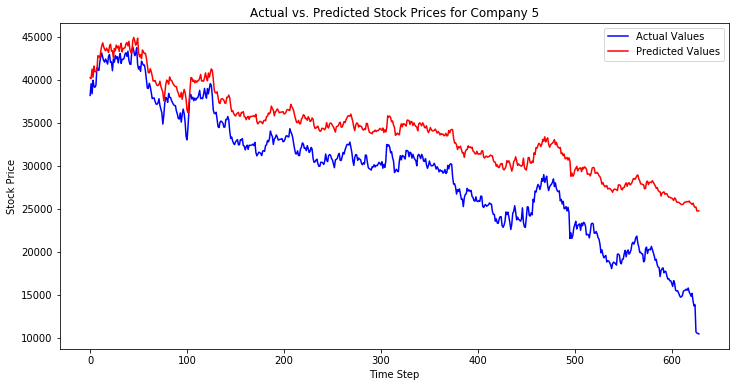

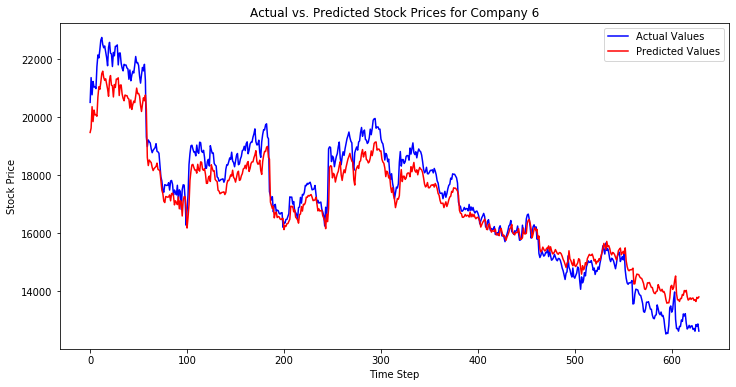

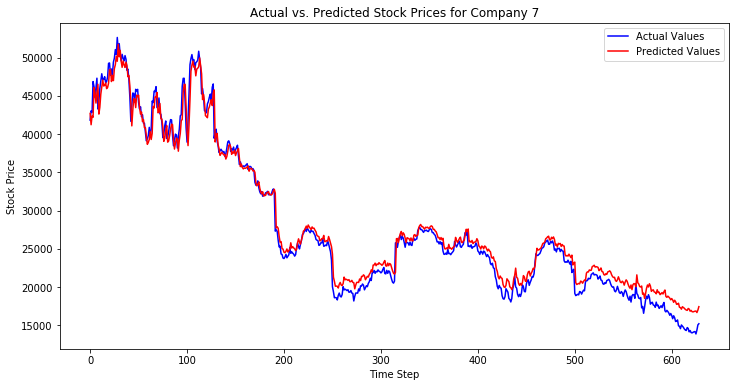

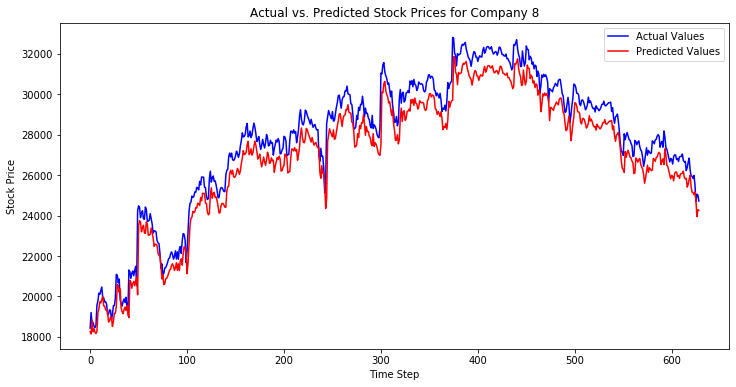

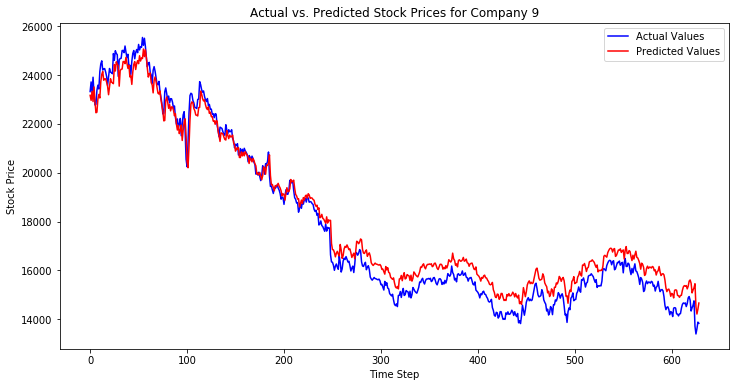

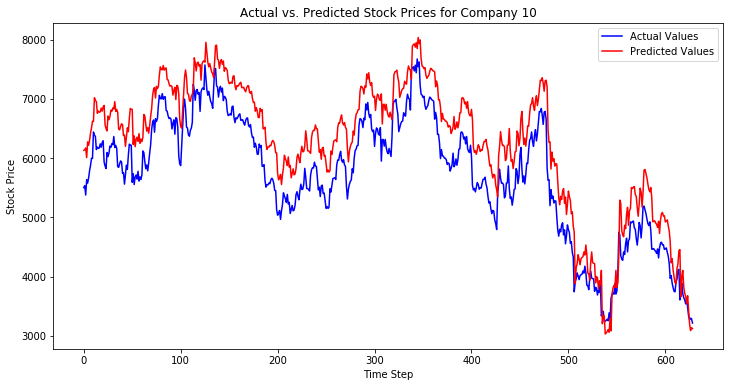

In [37]:
for company, lstm_model in lstm_models.items():
    # Get the test data for the current company
    X_test = X_test_dict[company]
    y_test = y_test_dict[company]

    # Reshape X_test to have the shape (number of samples, time steps, features)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Make predictions using the LSTM model
    y_pred = lstm_model.predict(X_test)

    # Inverse scale the predictions and actual values to their original scale
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test if needed

    # Plot the actual values and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Actual Values', color='blue')
    plt.plot(y_pred_inv, label='Predicted Values', color='red')
    plt.title(f"Actual vs. Predicted Stock Prices for {company}")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()



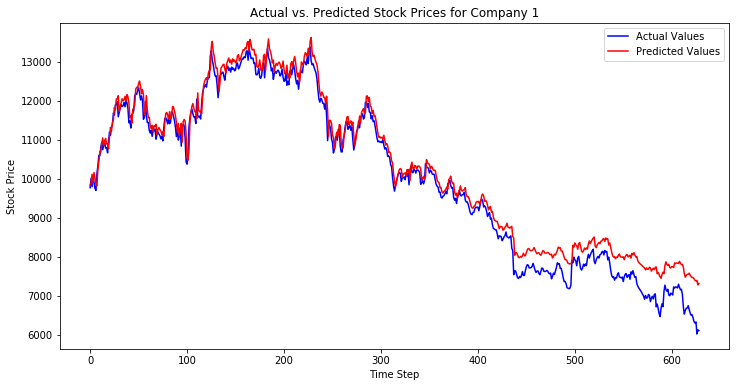

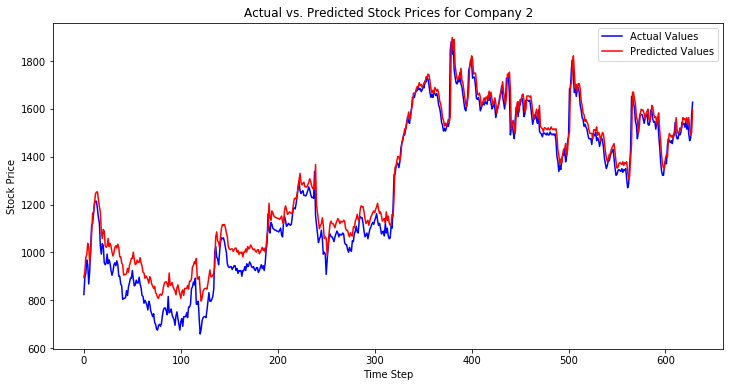

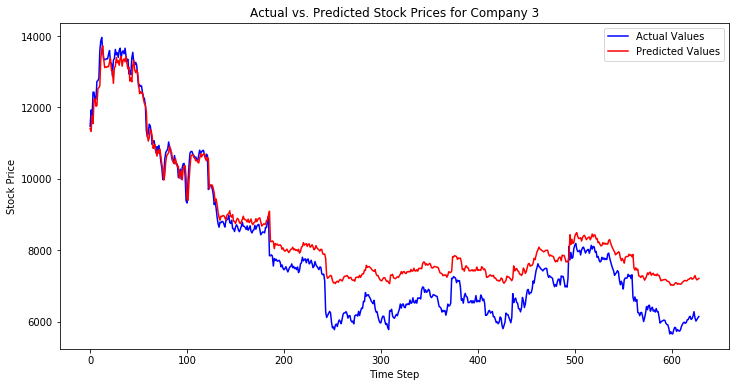

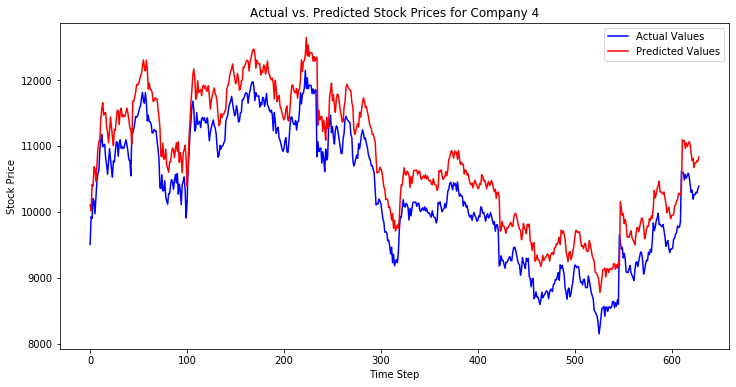

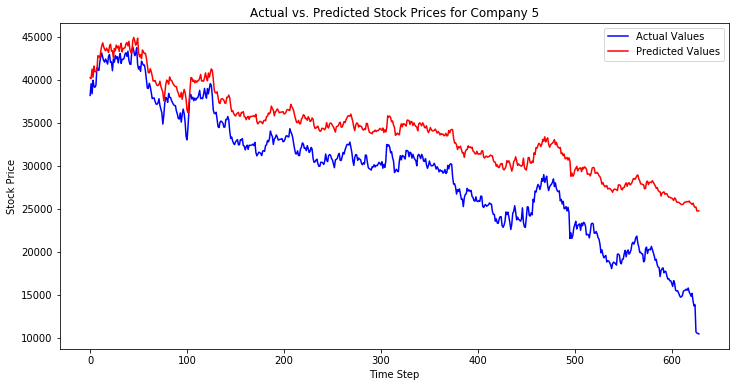

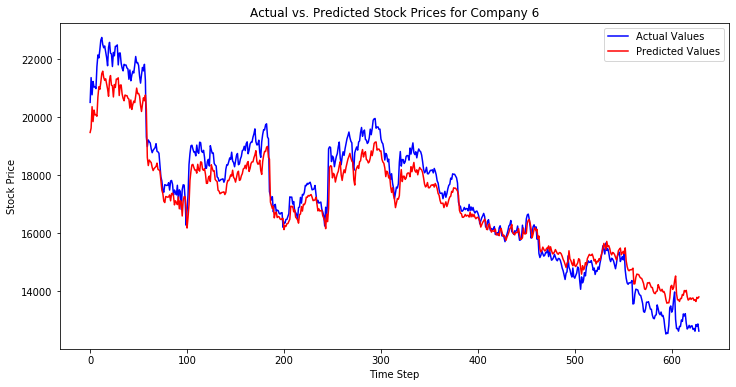

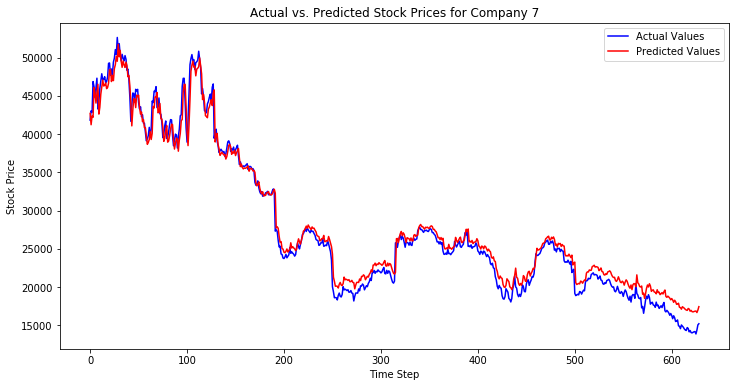

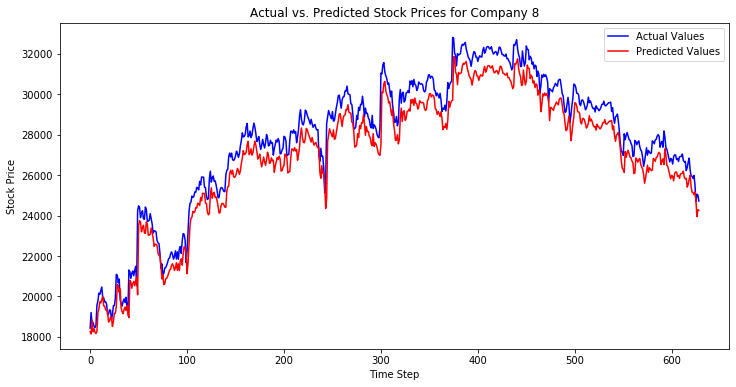

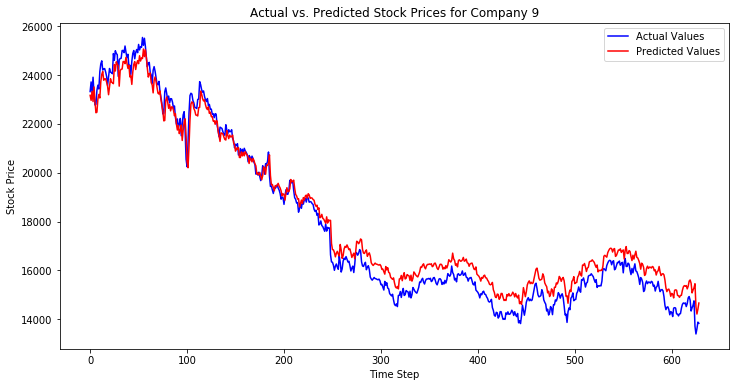

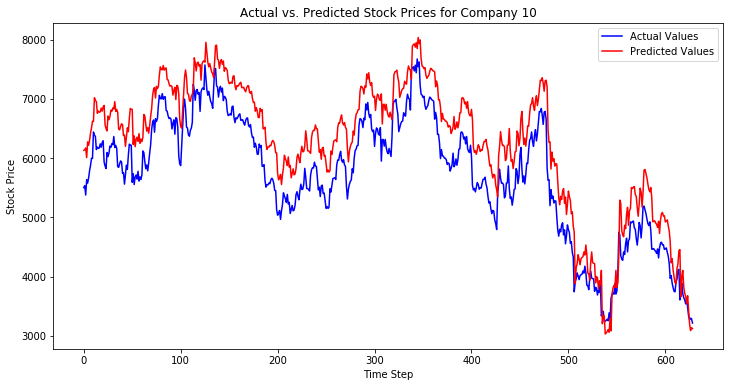

In [45]:
for company, lstm_model in lstm_models.items():
    # Get the test data for the current company
    X_test = X_test_dict[company]
    y_test = y_test_dict[company]

    # Reshape X_test to have the shape (number of samples, time steps, features)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Make predictions using the LSTM model
    y_pred = lstm_model.predict(X_test)

    # Inverse scale the predictions and actual values to their original scale
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Check if y_test is a 1D array or already a 2D array (samples, 1)
    if len(y_test.shape) == 1:
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test to 2D array
    else:
        y_test_inv = scaler.inverse_transform(y_test)

    # Flatten the 2D arrays for plotting
    y_pred_inv = y_pred_inv.flatten()
    y_test_inv = y_test_inv.flatten()

    # Plot the actual values and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Actual Values', color='blue')
    plt.plot(y_pred_inv, label='Predicted Values', color='red')
    plt.title(f"Actual vs. Predicted Stock Prices for {company}")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
